## TranslateView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@50987afc

This `Op` wraps the `Views.translate()` method of ImgLib2, [translating](https://en.wikipedia.org/wiki/Translation_(geometry)) a `RandomAccessible` or `RandomAccessibleInterval` by a given set of values. Let's see how the `Op` is called:

In [2]:
ij.op().help('translateView')

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.translateView.IntervalTranslateView(
		RandomAccessibleInterval in,
		long[] translation)
	(MixedTransformView out) =
	net.imagej.ops.transform.translateView.DefaultTranslateView(
		RandomAccessible in,
		long[] translation)

The parameters are pretty straightforward, with the `RandomAccessible`/`RandomAccessibleInterval` being the input image and `long[] translation` being an array of `long`s that define the translation in each dimension. Note that `translation` must contain an element for each dimension. Let's try this out:

[INFO] Populating metadata
[INFO] Populating metadata


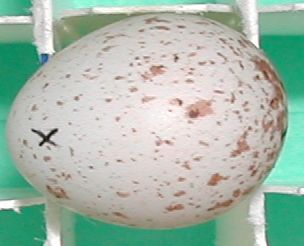

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/egg.jpg")

ij.notebook().display(input)

Let's translate our image by 10 pixels in width and height:

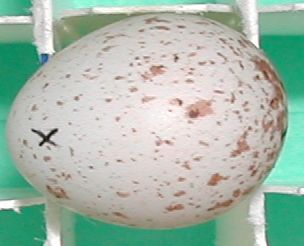

In [4]:
translation = [100, 100, 0] as long[]

translated = ij.op().run("translateView", input, translation)

ij.notebook().display(translated)

Note that there is **no difference** in the images. This is because we are **not** affecting the data in any way with this translation, **we are just altering the coordinates**. To show the change, let's print out the minimum of each image:

In [5]:
"minimum of input image: (" + input.min(0) + ", " + input.min(1) + ")\n" + 
"minimum of translated image: (" + translated.min(0) + ", " + translated.min(1) + ")"

minimum of input image: (0, 0)
minimum of translated image: (100, 100)

Note that this `Op` is very similar to [`offsetView`](offsetView.ipynb), however there is one key difference: `offsetView` only moves the image data, **not** the bounds of your image. `translateView`, however, also moves the image bounds along with your data, which is why there is no visual difference on the translated image above. This is what happens to the egg when we run `offsetView`:

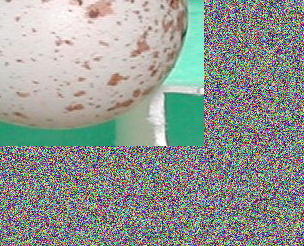

In [6]:
typeMin = input.firstElement().getMinValue()
typeMax = input.firstElement().getMaxValue()
extended = ij.op().run("extendRandomView", input, typeMin, typeMax)

//dimensions of output interval should be the same as the image before
dimension = [input.dimension(0), input.dimension(1), input.dimension(2)] as long[]

//use the same translation array as before - see offsetView for an explanation for how the Op is called.
offset = ij.op().run("offsetView", extended, translation, dimension)

ij.notebook().display(offset)

And, if we interrogate the two images for their minimum coordinates, we can see that `offset`'s bounds did not change while `translated`'s did:

In [7]:
"minimum of offset image: (" + offset.min(0) + ", " + offset.min(1) + ")\n" + 
"minimum of translated image: (" + translated.min(0) + ", " + translated.min(1) + ")"

minimum of offset image: (0, 0)
minimum of translated image: (100, 100)